In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [4]:
data = pd.read_csv('Heart_Disease_Prediction.csv')
data.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
data.drop('index',axis=1,inplace=True)

In [6]:
df = data.copy()

In [7]:
df.shape

(270, 14)

In [8]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [9]:
target = {'Absence':0,'Presence':1}

In [10]:
df['Heart Disease'] = df['Heart Disease'].map(target)

In [11]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [12]:
X = df.drop('Heart Disease',axis=1)
y = df['Heart Disease']

In [13]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [15]:
X_train.shape

(189, 13)

In [16]:
y_train.shape

(189,)

In [17]:
X_train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
246,65,1,4,110,248,0,2,158,0,0.6,1,2,6
166,50,0,4,110,254,0,2,159,0,0.0,1,0,3
132,42,1,4,140,226,0,0,178,0,0.0,1,0,3
253,51,1,3,110,175,0,0,123,0,0.6,1,0,3
143,51,1,1,125,213,0,2,125,1,1.4,1,1,3


In [18]:
y_train.head()

246    1
166    0
132    0
253    0
143    0
Name: Heart Disease, dtype: int64

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8271604938271605


In [20]:
model.feature_names_in_

array(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium'], dtype=object)

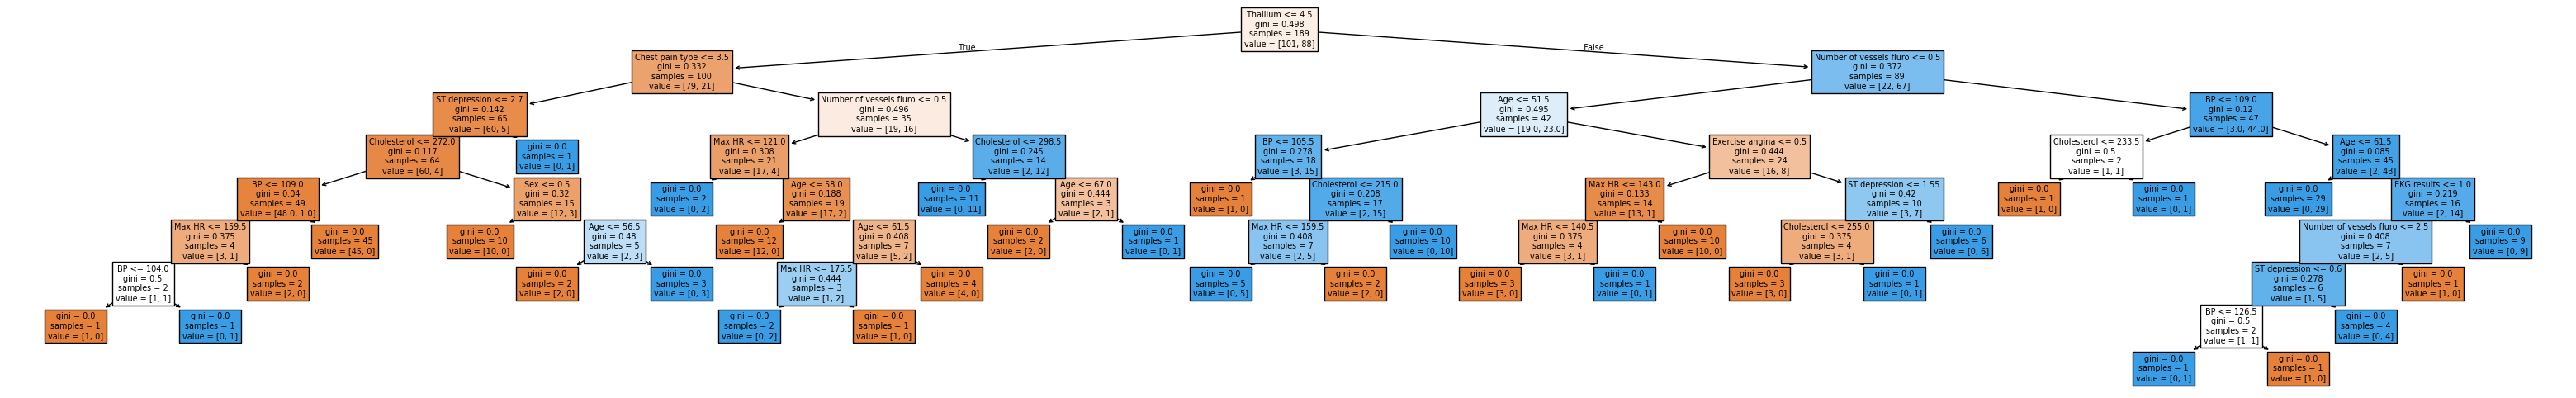

In [21]:
plt.figure(figsize=(40,6))
plot_tree(model,feature_names=model.feature_names_in_,filled=True)
plt.show()

In [22]:
model.get_depth()

8

In [23]:
model = DecisionTreeClassifier(max_depth=3,min_samples_split=50,min_samples_leaf=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7407407407407407


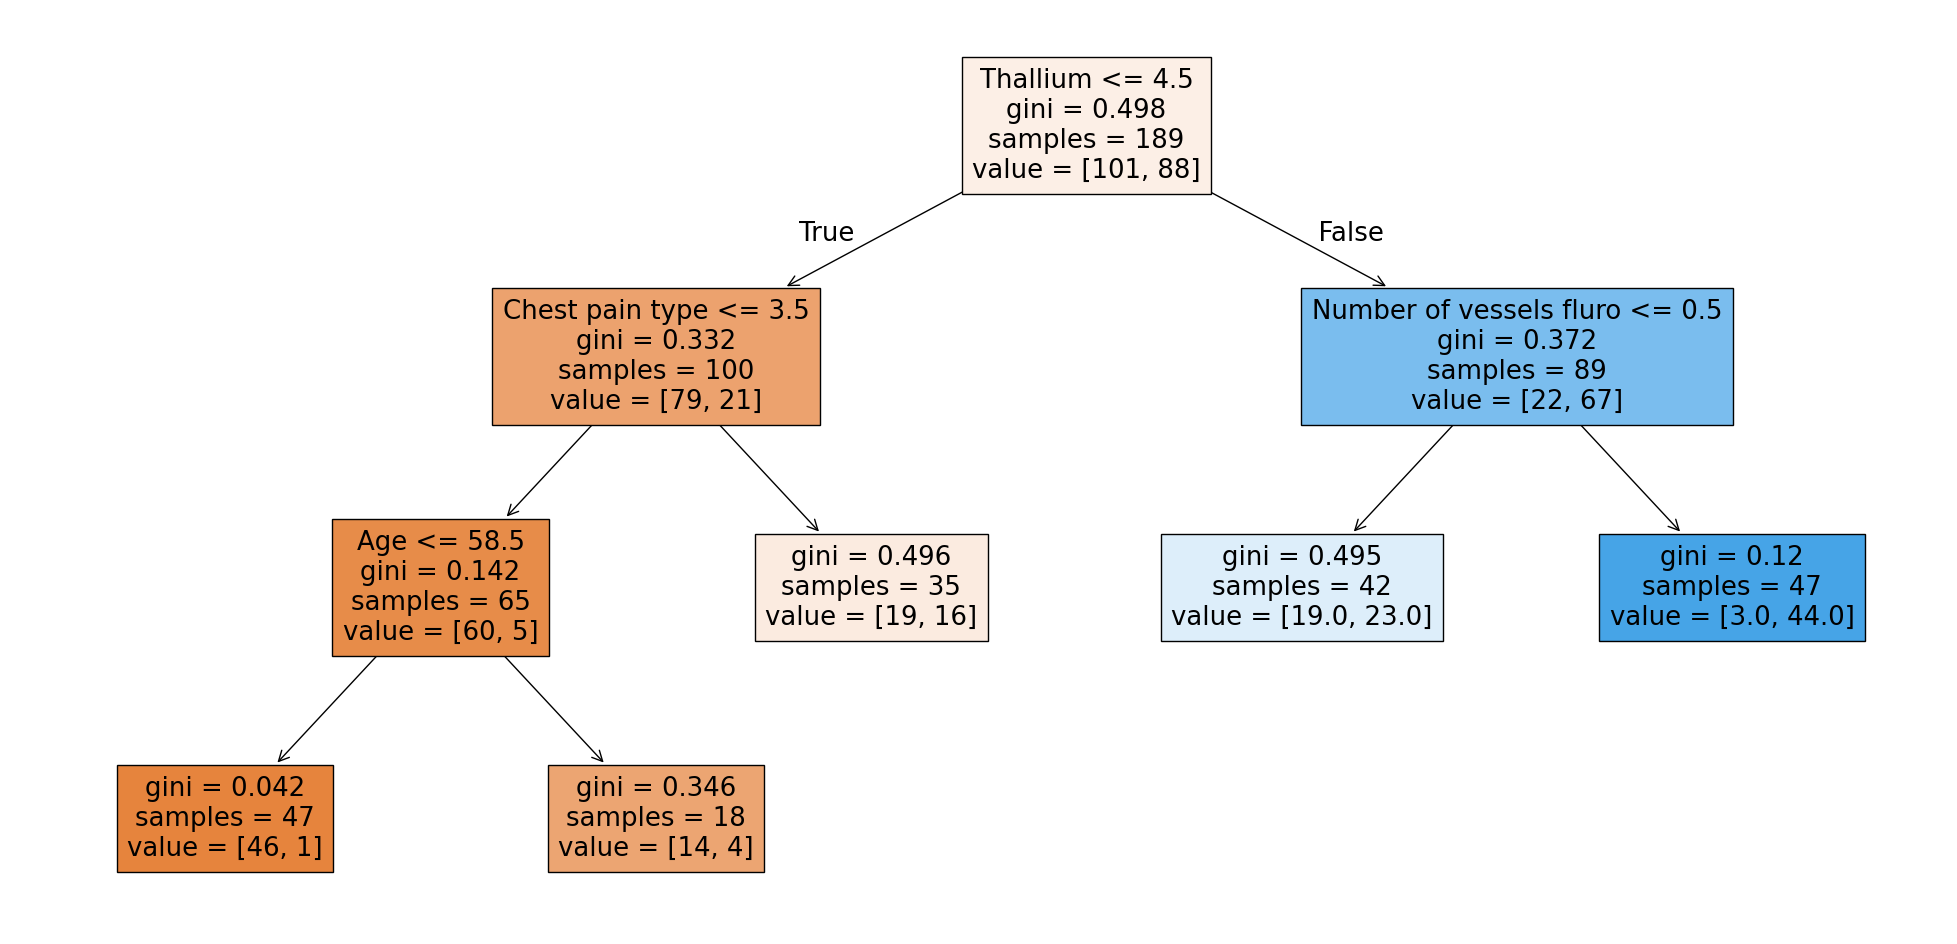

In [24]:
plt.figure(figsize=(25,12))
plot_tree(model,feature_names=model.feature_names_in_,filled=True)
plt.show()

In [25]:
cm = confusion_matrix(y_test,y_pred)

In [26]:
cm

array([[40,  9],
       [12, 20]], dtype=int64)

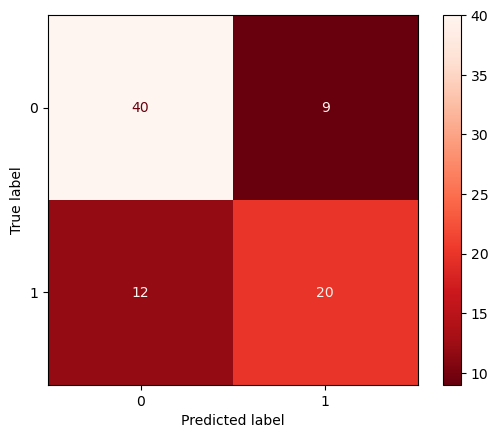

In [27]:
ConfusionMatrixDisplay(cm,display_labels=model.classes_).plot(cmap = plt.cm.Reds_r)

In [28]:
import sklearn
print(sklearn.__version__)

1.5.1


In [29]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.
